In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import calplot

# import data

In [6]:
fln = 'surfweer_data_2021_01_26_clean.csv'

In [7]:
df = pd.read_csv(fln, index_col=0, parse_dates=['report_date','post_date'])
df['week'] = df["report_date"].apply(lambda x:x.isocalendar()[1])
df['weekday'] = df["report_date"].apply(lambda x:x.weekday())

In [10]:
df_sub = df[df['year']==2019.0]

# calendar heatmap

In [11]:
from matplotlib import colors
import matplotlib.pyplot as plt


In [12]:
calendar = np.nan * np.zeros((8, 54))

week, weekday = zip(*[date.isocalendar()[1:] for date in df_sub["report_date"]])
calendar[weekday, week] = 1

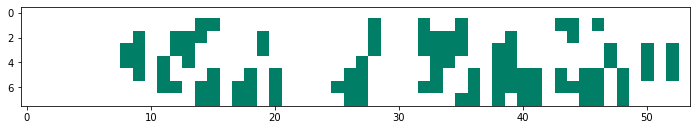

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(calendar, cmap='summer')

In [73]:
df['test'] = 1  
df_sub = df[['report_date', 'test']]
df_sub = df_sub.drop_duplicates()

In [76]:
events = pd.Series(df_sub['test'].to_numpy(), index=df_sub['report_date'])

In [118]:
import matplotlib.colors

# Color for False and True
cmap = matplotlib.colors.ListedColormap(['xkcd:ocean blue', 'green'])

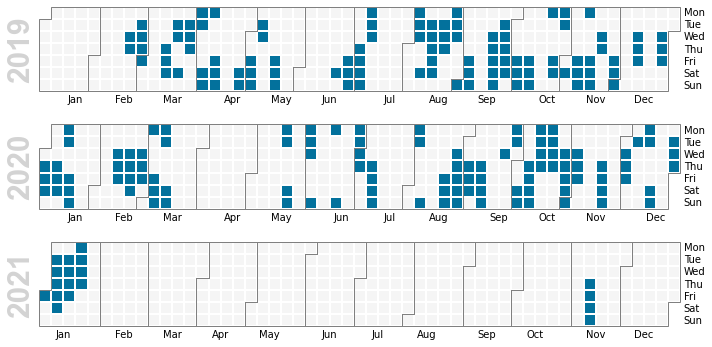

In [120]:
calplot.calplot(events, cmap = cmap );

# monthly report

In [125]:
df_monthly = df.groupby(['year', 'month'])['report_date'].count()

In [129]:
df_monthly = df_monthly.reset_index()

In [134]:
# df_monthly

In [131]:
import seaborn as sns

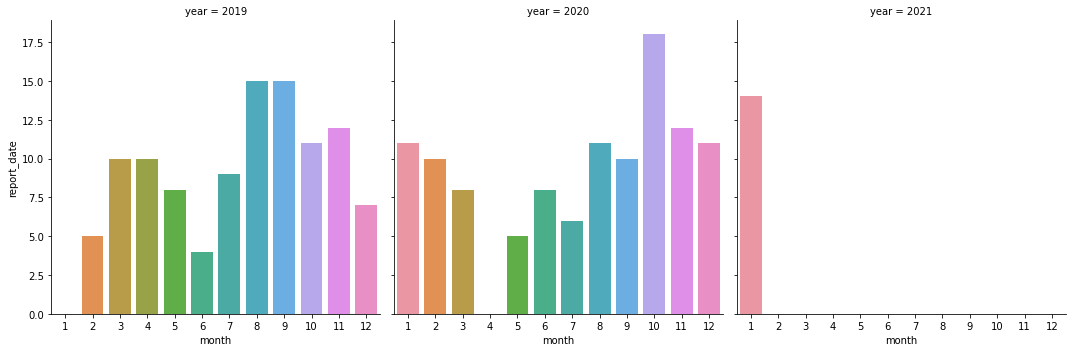

In [133]:
sns.catplot( x = 'month', y = 'report_date', col= 'year', data= df_monthly, kind='bar')

In [136]:
df_monthly['test'] = 1

<AxesSubplot:>

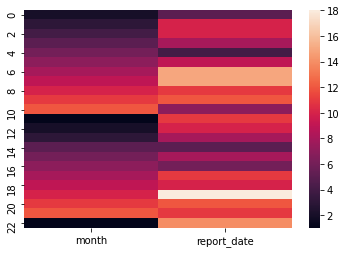

In [145]:
sns.heatmap(df_monthly[['month','report_date']])

<AxesSubplot:>

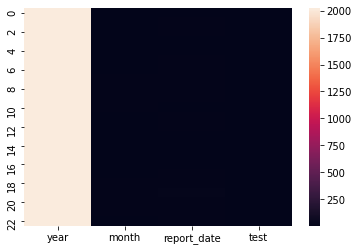

In [138]:
sns.heatmap(df_monthly)

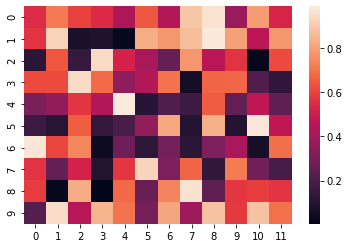

In [140]:
import numpy as np; np.random.seed(0)
import seaborn as sns; 
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [143]:
# np.array(uniform_data)

In [146]:
uniform_data

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
        0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 , 0.0202184 ,
        0.83261985, 0.77815675, 0.87001215, 0.97861834, 0.79915856,
        0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329, 0.94466892, 0.52184832,
        0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395,
        0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ,
        0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787,
        0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384,
        0.10204481, 0.20887676, 0.16130952, 0.65310833, 0.2532916 ,
        0.46631077, 0.24442559],
       [0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
        0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
        0.97645947,